In [1]:
from sympy import *
from sympy.abc import x,y,z,t,i,j,k,a,b,c,r
from numpy import dot
import matplotlib.pyplot as plt
from numpy import linspace

**1. Evaluation of Double Integrals
<br>
a) Constant Limits
<br>
b) Variable Limits**

In [2]:
def Integrate_2(f,xo,x1,yo,y1):
    return round(float(integrate(f,(y,yo,y1),(x,xo,x1))),3)

print(Integrate_2(y*sin(x),0,pi/2,-1,2))

print(Integrate_2(x*y**2,1,2,0,x))

1.5
2.067


**1. Evaluation of Triple Integrals
<br>
a) Constant Limits
<br>
b) Variable Limits**

In [3]:
def Integrate_3(f,xo,x1,yo,y1,zo,z1):
    return round(float(integrate(f,(z,zo,z1),(y,yo,y1),(x,xo,x1))),3)

print(Integrate_3(x**2+y**2+z**2,0,1,0,1,0,1))

print(Integrate_3((x*y),0,1,x**2,sqrt(x),0,x+y))

1.0
0.107


**3. Evaluating Line Integrals**

In [4]:
var=[x,y,z]

def line(f,R,a,b):
    n=len(R)
    for i in range(n):
        f=f.subs(var[i],R[i])
    dsdt=0
    for i in range(n):
        dsdt+=(diff(R[i],t)**2)
    eq=f*sqrt(dsdt)
    return integrate(eq,(t,a,b))

print(line((x+y),[t,1-t,0],0,1))

sqrt(2)


**4. Evaluating Area and Volume using Multiple Integrals**

In [5]:
def Integrate_2(f,xo,x1,yo,y1):
    return integrate(f,(x,xo,x1),(y,yo,y1))

def Integrate_3(f,xo,x1,yo,y1,zo,z1):
    return integrate(f,(x,xo,x1),(y,yo,y1),(z,zo,z1))

print(Integrate_2(1,y-2,(-y**2),-2,1))

print(Integrate_3(1,0,1-z,0,2-2*z,0,1))

9/2
2/3


**5. Computing Surface Area using double integral**

In [6]:
def surface_area(F,p,r0,r1,t0,t1):
    F1=[F.diff(x),F.diff(y),F.diff(z)]
    gradF=sqrt(F.diff(x)**2+F.diff(y)**2+F.diff(z)**2)
    Fp=sqrt(dot(F1,p)**2)
    f=gradF/Fp
    if p==[1,0,0]:
        f1=f.subs([(y,r*cos(t)),(z,r*sin(t))])
    elif p==[0,1,0]:
        f1=f.subs([(z,r*cos(t)),(x,r*sin(t))])
    else:
        f1=f.subs([(x,r*cos(t)),(y,r*sin(t))]).simplify()
    return integrate(f1*r,(r,r0,r1),(t,t0,t1)).simplify()

surface_area(x**2+y**2-z,[0,0,1],0,2,0,2*pi)

pi*(-1 + 17*sqrt(17))/6

**6. Verifying Green's Theorem**

In [7]:
def line(F,valx,valy,t0,t1):
    F=F.subs(x,valx).subs(y,valy)
    dx=diff(valx,t)
    dy=diff(valy,t)
    Fdr=F.coeff(i)*dx+F.coeff(j)*dy
    return integrate(Fdr,(t,t0,t1))

def surface(M,N,x0,x1,y0,y1):
    Nx=diff(N,x)
    My=diff(M,y)
    eq=(Nx-My).simplify()
    return integrate(eq,(x,x0,x1),(y,y0,y1))

a=line((x-y)*i+x*j,cos(t),sin(t),0,2*pi)
b=surface(x-y,x,-sqrt(1-y**2),sqrt(1-y**2),-1,1)

if a==b:
    print("LHS is",a)
    print("RHS is",b)
    print("Green's Theorem is verified")

LHS is 2*pi
RHS is 2*pi
Green's Theorem is verified


**7. Verifying Gauss Divergence Theorem**

In [8]:
def surface(F,n,lim1i,lim1f,lim2i,lim2f):
    Fn=(F.coeff(i)*n.coeff(i)+F.coeff(j)*n.coeff(j)+F.coeff(k)*n.coeff(k)).simplify()
    if n==k or n==-k:
        return integrate(Fn,(x,lim1i,lim1f),(y,lim2i,lim2f))
    elif n==i or n==-i:
        return integrate(Fn,(y,lim1i,lim1f),(z,lim2i,lim2f))
    else:
        return integrate(Fn,(x,lim1i,lim1f),(z,lim2i,lim2f))

def volume(F,x0,x1,y0,y1,z0,z1):
    divF=(diff(F.coeff(i),x)+diff(F.coeff(j),y)+diff(F.coeff(k),z)).simplify()
    sol=integrate(divF,(x,x0,x1),(y,y0,y1),(z,z0,z1)).simplify()
    return sol

s1=surface((x**2-0*z)*i+(0**2-x*z)*j+(z**2-0*x)*k,-j,0,a,0,c)
s2=surface((x**2-b*z)*i+(b**2-x*z)*j+(z**2-b*x)*k,j,0,a,0,c)
s3=surface((x**2-y*0)*i+(y**2-x*0)*j+(0**2-y*x)*k,-k,0,a,0,b)
s4=surface((x**2-y*c)*i+(y**2-x*c)*j+(c**2-y*x)*k,k,0,a,0,b)
s5=surface((0**2-y*z)*i+(y**2-0*z)*j+(z**2-y*0)*k,-i,0,b,0,c)
s6=surface((a**2-y*z)*i+(y**2-a*z)*j+(z**2-y*a)*k,i,0,b,0,c)
v=volume((x**2-y*z)*i+(y**2-x*z)*j+(z**2-y*x)*k,0,a,0,b,0,c)
print("LHS is",(s1+s2+s3+s4+s5+s6).simplify())
print("RHS is",v)
if (s1+s2+s3+s4+s5+s6).simplify()==v:
    print("Gauss Divergence Theorem is verified")

LHS is 4*pi**2*c*(c + 4*pi)
RHS is 4*pi**2*c*(c + 4*pi)
Gauss Divergence Theorem is verified


**8. Computing Darboux Sums**

The Lower Sum is 85.79102
The Upper Sum is 233.20418


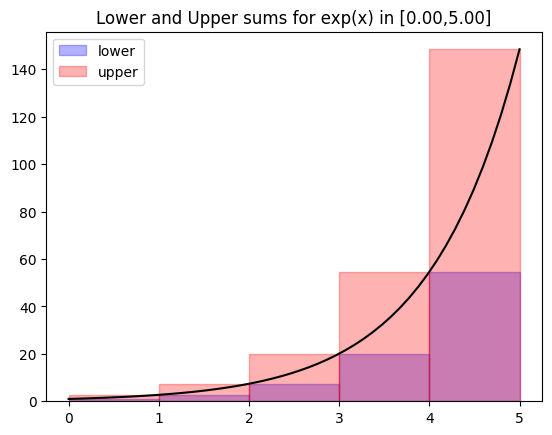

In [9]:
def increasing(f,p):
  sum_lower=0
  sum_upper=0
  f1=[f.subs(x,i) for i in p]
  for i in range(len(p)-1):
    sum_lower += f1[i]*(p[i+1]-p[i])
    sum_upper += f1[i+1]*(p[i+1]-p[i])
  print(f"The Lower Sum is {sum_lower:0.5f}")
  print(f"The Upper Sum is {sum_upper:0.5f}")

  f2 = [f.subs(x,k) for k in linspace(p[0],p[-1])]
  plt.plot(linspace(p[0],p[-1]), f2, color='black')

  w_lower = [p[i+1]-p[i] for i in range(len(p)-1)]
  plt.bar(p[:-1], f1[:-1], width=w_lower, align='edge', alpha=0.3, edgecolor='b', color='b', label='lower')


  w_upper = [-(p[i+1]-p[i]) for i in range(len(p)-1)]
  plt.bar(p[1:], f1[1:], width=w_upper, align='edge', alpha=0.3, edgecolor='r', color='r', label='upper')
  plt.title(f"Lower and Upper sums for {f} in [{p[0]:0.2f},{p[-1]:0.2f}]")
  plt.legend()

increasing(exp(x),[0,1,2,3,4,5])

The Lower Sum is 0.57806
The Upper Sum is 1.57132


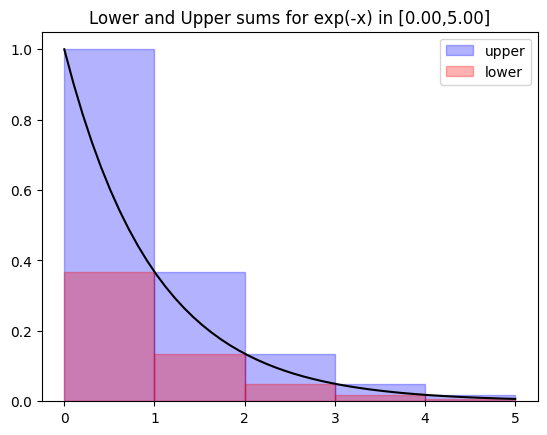

In [10]:
def decreasing(f,p):
  sum_lower=0
  sum_upper=0
  f1=[f.subs(x,i) for i in p]
  for i in range(len(p)-1):
    sum_upper += f1[i]*(p[i+1]-p[i])
    sum_lower += f1[i+1]*(p[i+1]-p[i])
  print(f"The Lower Sum is {sum_lower:0.5f}")
  print(f"The Upper Sum is {sum_upper:0.5f}")

  f2 = [f.subs(x,k) for k in linspace(p[0],p[-1])]
  plt.plot(linspace(p[0],p[-1]), f2, color='black')

  w_upper = [p[i+1]-p[i] for i in range(len(p)-1)]
  plt.bar(p[:-1], f1[:-1], width=w_upper, align='edge', alpha=0.3, edgecolor='b', color='b', label='upper')

  w_lower = [-(p[i+1]-p[i]) for i in range(len(p)-1)]
  plt.bar(p[1:], f1[1:], width=w_lower, align='edge', alpha=0.3, edgecolor='r', color='r', label='lower')
  plt.title(f"Lower and Upper sums for {f} in [{p[0]:0.2f},{p[-1]:0.2f}]")
  plt.legend()

decreasing(exp(-x),[0,1,2,3,4,5])